In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.subplots as sp
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, matthews_corrcoef

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
EC=pd.read_csv('/content/drive/MyDrive/MScProject/data.csv')
EC.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,1.00,1.00,0.0,0.0,2,1,1,1,1,2,0,0
1,0,0.0,0,0.0,2,0.001000,0.00,0.50,0.0,0.0,2,2,2,1,2,2,0,0
2,0,0.0,0,0.0,1,0.000000,1.00,1.00,0.0,0.0,2,4,1,9,3,2,0,0
3,0,0.0,0,0.0,2,0.000042,0.25,0.70,0.0,0.0,2,3,2,2,4,2,0,0
4,0,0.0,0,0.0,10,0.009809,0.10,0.25,0.0,0.0,2,3,3,1,4,2,1,0


In [5]:
X = EC.drop('Revenue', axis=1)
y = EC['Revenue']

In [26]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X, y)
X_trainn, X_testt, y_trainn, y_testt = train_test_split(X_train_resampled, y_train_resampled, test_size=0.2, random_state=42)
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_trainn, y_trainn)
y_pred = rf_classifier.predict(X_testt)
print(classification_report(y_testt, y_pred))

# Make predictions on the testing set
y_pred_proba = rf_classifier.predict_proba(X_testt)[:, 1]  # Predict probabilities for class 1

# Calculate AUC score
auc = roc_auc_score(y_testt, y_pred_proba)
print("AUC Score:", auc)

# Calculate MCC score
mcc = matthews_corrcoef(y_testt, y_pred)
print("MCC Score:", mcc)

              precision    recall  f1-score   support

           0       0.95      0.91      0.93      2062
           1       0.92      0.96      0.94      2107

    accuracy                           0.93      4169
   macro avg       0.94      0.93      0.93      4169
weighted avg       0.93      0.93      0.93      4169

AUC Score: 0.9822171441829164
MCC Score: 0.8689346683090209


In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid
param_grid = {
    'n_estimators': [200],  # Number of trees in the forest
    'max_depth': [None],  # Maximum depth of the trees
    'min_samples_split': [ 10],  # Minimum number of samples required to split a node
    'min_samples_leaf': [2],  # Minimum number of samples required at each leaf node
    'max_features': ['auto'],  # Number of features to consider when looking for the best split
    'criterion': [ 'entropy'],  # Function to measure the quality of a split
    'class_weight': [None]  # Weights associated with classes
}


# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Initialize Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=10, scoring='accuracy', n_jobs=-1)

# Perform Grid Search
grid_search.fit(X_trainn, y_trainn)

# Get the best parameters and the best accuracy score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Accuracy Score:", best_score)
rf_classifier = RandomForestClassifier(**best_params, random_state=42)

# Train the model on the entire training dataset (X_train and y_train combined)
rf_classifier.fit(X_trainn, y_trainn)

# Make predictions on the test dataset (X_test)
y_pred = rf_classifier.predict(X_testt)
print(classification_report(y_testt, y_pred))
# Make predictions on the testing set
y_pred_probar = rf_classifier.predict_proba(X_testt)[:, 1]  # Predict probabilities for class 1

# Calculate AUC score
auc = roc_auc_score(y_testt, y_pred_probar)
print("AUC Score:", auc)

# Calculate MCC score
mcc = matthews_corrcoef(y_testt, y_pred)
print("MCC Score:", mcc)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best Parameters: {'class_weight': None, 'criterion': 'entropy', 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}
Best Accuracy Score: 0.9261774263852265


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


              precision    recall  f1-score   support

           0       0.95      0.90      0.93      2062
           1       0.91      0.95      0.93      2107

    accuracy                           0.93      4169
   macro avg       0.93      0.93      0.93      4169
weighted avg       0.93      0.93      0.93      4169

AUC Score: 0.9806147077061037
MCC Score: 0.8608219184490283


In [28]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X, y)
X_trainn, X_testt, y_trainn, y_testt = train_test_split(X_train_resampled, y_train_resampled, test_size=0.2, random_state=42)
gb_classifier = GradientBoostingClassifier(random_state=42)
gb_classifier.fit(X_trainn, y_trainn)
y_pred = gb_classifier.predict(X_testt)
print(classification_report(y_testt, y_pred))

# Make predictions on the testing set
y_pred_proba = gb_classifier.predict_proba(X_testt)[:, 1]  # Predict probabilities for class 1

# Calculate AUC score
auc = roc_auc_score(y_testt, y_pred_proba)
print("AUC Score:", auc)

# Calculate MCC score
mcc = matthews_corrcoef(y_testt, y_pred)
print("MCC Score:", mcc)

              precision    recall  f1-score   support

           0       0.93      0.90      0.91      2062
           1       0.91      0.93      0.92      2107

    accuracy                           0.92      4169
   macro avg       0.92      0.92      0.92      4169
weighted avg       0.92      0.92      0.92      4169

AUC Score: 0.9726545435127562
MCC Score: 0.8327594844280783


In [29]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

# Define the parameter grid
param_grid = {
    'n_estimators': [ 300],  # Number of boosting stages (trees)
    'learning_rate': [ 0.1],  # Learning rate (shrinkage) of each tree
    'max_depth': [ 7],  # Maximum depth of the individual trees
    'min_samples_split': [ 10],  # Minimum number of samples required to split a node
    'min_samples_leaf': [ 4],  # Minimum number of samples required at each leaf node
}

# Initialize the Gradient Boosting classifier
gb_classifier = GradientBoostingClassifier(random_state=42)

# Initialize Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=gb_classifier, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Perform Grid Search
grid_search.fit(X_trainn, y_trainn)

# Get the best parameters and the best accuracy score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Accuracy Score:", best_score)
gb_classifier = GradientBoostingClassifier(**best_params, random_state=42)

# Train the model on the entire training dataset (X_train and y_train combined)
gb_classifier.fit(X_trainn, y_trainn)

# Make predictions on the test dataset (X_test)
y_pred = gb_classifier.predict(X_testt)
print(classification_report(y_testt, y_pred))
# Make predictions on the testing set
y_pred_probag = gb_classifier.predict_proba(X_testt)[:, 1]  # Predict probabilities for class 1

# Calculate AUC score
auc = roc_auc_score(y_testt, y_pred_probag)
print("AUC Score:", auc)

# Calculate MCC score
mcc = matthews_corrcoef(y_testt, y_pred)
print("MCC Score:", mcc)


Best Parameters: {'learning_rate': 0.1, 'max_depth': 7, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 300}
Best Accuracy Score: 0.9326536731634182
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      2062
           1       0.93      0.95      0.94      2107

    accuracy                           0.94      4169
   macro avg       0.94      0.94      0.94      4169
weighted avg       0.94      0.94      0.94      4169

AUC Score: 0.9833491152534367
MCC Score: 0.8817875601452532


In [30]:
from imblearn.over_sampling import SMOTE
import xgboost as xgb
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X, y)
X_trainn, X_testt, y_trainn, y_testt = train_test_split(X_train_resampled, y_train_resampled, test_size=0.2, random_state=42)
xgb_classifier = xgb.XGBClassifier(random_state=42)
xgb_classifier.fit(X_trainn, y_trainn)
y_pred = xgb_classifier.predict(X_testt)
print(classification_report(y_testt, y_pred))

# Make predictions on the testing set
y_pred_proba = xgb_classifier.predict_proba(X_testt)[:, 1]  # Predict probabilities for class 1

# Calculate AUC score
auc = roc_auc_score(y_testt, y_pred_proba)
print("AUC Score:", auc)

# Calculate MCC score
mcc = matthews_corrcoef(y_testt, y_pred)
print("MCC Score:", mcc)

              precision    recall  f1-score   support

           0       0.95      0.92      0.93      2062
           1       0.92      0.95      0.94      2107

    accuracy                           0.93      4169
   macro avg       0.94      0.93      0.93      4169
weighted avg       0.94      0.93      0.93      4169

AUC Score: 0.9827324925413741
MCC Score: 0.8703096184093667


In [31]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

# Define the parameter grid
param_grid = {
    'learning_rate': [ 0.1],  # Learning rate (shrinkage) of each tree
    'max_depth': [ 7],  # Maximum depth of the trees
    'min_child_weight': [1],  # Minimum sum of instance weight needed in a child
    'gamma': [ 0.2],  # Minimum loss reduction required to make a further partition on a leaf node
    'subsample': [0.8],  # Subsample ratio of the training instances
    'colsample_bytree': [0.6],  # Subsample ratio of columns when constructing each tree
}

# Initialize the XGBoost classifier
xgb_classifier = xgb.XGBClassifier(random_state=42)

# Initialize Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Perform Grid Search
grid_search.fit(X_trainn, y_trainn)

# Get the best parameters and the best accuracy score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Accuracy Score:", best_score)
xgb_classifier = xgb.XGBClassifier(**best_params, random_state=42)

# Train the model on the entire training dataset (X_train and y_train combined)
xgb_classifier.fit(X_trainn, y_trainn)

# Make predictions on the test dataset (X_test)
y_pred = xgb_classifier.predict(X_testt)
print(classification_report(y_testt, y_pred))
# Make predictions on the testing set
y_pred_probax = xgb_classifier.predict_proba(X_testt)[:, 1]  # Predict probabilities for class 1

# Calculate AUC score
auc = roc_auc_score(y_testt, y_pred_probax)
print("AUC Score:", auc)

# Calculate MCC score
mcc = matthews_corrcoef(y_testt, y_pred)
print("MCC Score:", mcc)

Best Parameters: {'colsample_bytree': 0.6, 'gamma': 0.2, 'learning_rate': 0.1, 'max_depth': 7, 'min_child_weight': 1, 'subsample': 0.8}
Best Accuracy Score: 0.9282758620689655
              precision    recall  f1-score   support

           0       0.94      0.92      0.93      2062
           1       0.92      0.94      0.93      2107

    accuracy                           0.93      4169
   macro avg       0.93      0.93      0.93      4169
weighted avg       0.93      0.93      0.93      4169

AUC Score: 0.9805359899130743
MCC Score: 0.860584447746492


In [32]:
from imblearn.over_sampling import SMOTE
import lightgbm as lgb
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X, y)
X_trainn, X_testt, y_trainn, y_testt = train_test_split(X_train_resampled, y_train_resampled, test_size=0.2, random_state=42)
lgb_classifier = lgb.LGBMClassifier(random_state=42)
lgb_classifier.fit(X_trainn, y_trainn)
y_pred = lgb_classifier.predict(X_testt)
print(classification_report(y_testt, y_pred))

# Make predictions on the testing set
y_pred_proba = lgb_classifier.predict_proba(X_testt)[:, 1]  # Predict probabilities for class 1

# Calculate AUC score
auc = roc_auc_score(y_testt, y_pred_proba)
print("AUC Score:", auc)

# Calculate MCC score
mcc = matthews_corrcoef(y_testt, y_pred)
print("MCC Score:", mcc)




[LightGBM] [Info] Number of positive: 8315, number of negative: 8360
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002320 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2151
[LightGBM] [Info] Number of data points in the train set: 16675, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.498651 -> initscore=-0.005397
[LightGBM] [Info] Start training from score -0.005397
              precision    recall  f1-score   support

           0       0.94      0.92      0.93      2062
           1       0.92      0.95      0.93      2107

    accuracy                           0.93      4169
   macro avg       0.93      0.93      0.93      4169
weighted avg       0.93      0.93      0.93      4169

AUC Score: 0.9812598713723641
MCC Score: 0.864932925150871


In [33]:
from sklearn.model_selection import GridSearchCV
import lightgbm as lgb

# Define the parameter grid
param_grid = {
    'learning_rate': [ 0.1],
    'max_depth': [ 7],
    'min_child_samples': [5],
    'subsample': [0.6],
    'colsample_bytree': [0.6],
    'num_leaves':[31],
}

# Initialize the LightGBM classifier
lgb_classifier = lgb.LGBMClassifier(random_state=42)

# Initialize Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=lgb_classifier, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Perform Grid Search
grid_search.fit(X_trainn, y_trainn)

# Get the best parameters and the best accuracy score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Accuracy Score:", best_score)
print("Best Parameters:", best_params)
print("Best Accuracy Score:", best_score)
lgb_classifier = lgb.LGBMClassifier(**best_params, random_state=42)

# Train the model on the entire training dataset (X_train and y_train combined)
lgb_classifier.fit(X_trainn, y_trainn)

# Make predictions on the test dataset (X_test)
y_pred = lgb_classifier.predict(X_testt)
print(classification_report(y_testt, y_pred))
# Make predictions on the testing set
y_pred_probal = lgb_classifier.predict_proba(X_testt)[:, 1]  # Predict probabilities for class 1

# Calculate AUC score
auc = roc_auc_score(y_testt, y_pred_probal)
print("AUC Score:", auc)

# Calculate MCC score
mcc = matthews_corrcoef(y_testt, y_pred)
print("MCC Score:", mcc)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 8315, number of negative: 8360
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006604 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2151
[LightGBM] [Info] Number of data points in the train set: 16675, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.498651 -> initscore=-0.005397
[LightGBM] [Info] Start training from score -0.005397
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Best Parameters: {'colsample_bytree': 0.6, 'learning_rate': 0.1, 'max_depth': 7, 'min_child_samples': 5, 'num_leaves': 31, 'subsample': 0.6}
Best Accuracy Score: 0.927436281

In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
# Define the parameter grid
param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Initialize the Random Forest classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Initialize Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Perform Grid Search
grid_search.fit(X_trainn, y_trainn)

# Get the best parameters and the best accuracy score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Accuracy Score:", best_score)
dt_classifier = DecisionTreeClassifier(**best_params, random_state=42)

# Train the model on the entire training dataset (X_train and y_train combined)
dt_classifier.fit(X_trainn, y_trainn)

# Make predictions on the test dataset (X_test)
y_pred = dt_classifier.predict(X_testt)
print(classification_report(y_testt, y_pred))
# Make predictions on the testing set
y_pred_probad = dt_classifier.predict_proba(X_testt)[:, 1]  # Predict probabilities for class 1

# Calculate MCC score
mcc = matthews_corrcoef(y_testt, y_pred)
print("MCC Score:", mcc)


# Calculate AUC score
auc = roc_auc_score(y_testt, y_pred_probad)
print("AUC Score:", auc)


Best Parameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5}
Best Accuracy Score: 0.9067466266866567
              precision    recall  f1-score   support

           0       0.92      0.91      0.91      2062
           1       0.91      0.92      0.92      2107

    accuracy                           0.92      4169
   macro avg       0.92      0.92      0.92      4169
weighted avg       0.92      0.92      0.92      4169

MCC Score: 0.830672943228811
AUC Score: 0.948805814252708


In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
# Define the parameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

# Initialize the k-NN classifier
knn_classifier = KNeighborsClassifier()

# Initialize Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=knn_classifier, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Perform Grid Search
grid_search.fit(X_trainn, y_trainn)

# Get the best parameters and the best accuracy score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Accuracy Score:", best_score)

# Initialize a new k-NN classifier with the best parameters
best_knn_classifier = KNeighborsClassifier(**best_params)

# Train the model on the entire training dataset with the best parameters
best_knn_classifier.fit(X_trainn, y_trainn)

# Make predictions on the test dataset
y_pred = best_knn_classifier.predict(X_testt)

# Evaluate the model's performance
accuracy = accuracy_score(y_testt, y_pred)
print("Accuracy:", accuracy)

# Generate classification report
print("Classification Report:")
print(classification_report(y_testt, y_pred))
y_pred_probak = best_knn_classifier.predict_proba(X_testt)[:, 1]  # Predict probabilities for class 1

# Calculate MCC score
mcc = matthews_corrcoef(y_testt, y_pred)
print("MCC Score:", mcc)


# Calculate AUC score
auc = roc_auc_score(y_testt, y_pred_probak)
print("AUC Score:", auc)

Best Parameters: {'algorithm': 'auto', 'n_neighbors': 3, 'weights': 'distance'}
Best Accuracy Score: 0.8214092953523238
Accuracy: 0.8438474454305589
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.72      0.82      2062
           1       0.78      0.96      0.86      2107

    accuracy                           0.84      4169
   macro avg       0.86      0.84      0.84      4169
weighted avg       0.86      0.84      0.84      4169

MCC Score: 0.7070266953558311
AUC Score: 0.9129276482207709


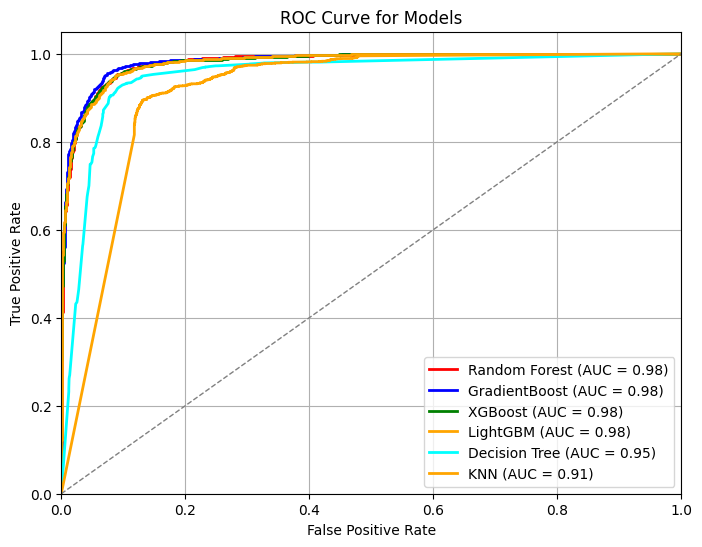

In [34]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming you have stored the predicted probabilities for each model in separate variables
# Replace y_score_rf, y_score_dt, y_score_gb, and y_score_lr with your actual predicted probabilities

# Get false positive rate (fpr) and true positive rate (tpr) for each model
fpr_rf, tpr_rf, _ = roc_curve(y_testt, y_pred_probar)
fpr_dt, tpr_dt, _ = roc_curve(y_testt, y_pred_probag)
fpr_gb, tpr_gb, _ = roc_curve(y_testt, y_pred_probax)
fpr_lr, tpr_lr, _ = roc_curve(y_testt, y_pred_probal)
fpr_d, tpr_d, _ = roc_curve(y_testt, y_pred_probad)
fpr_k, tpr_k, _ = roc_curve(y_testt, y_pred_probak)

# Calculate AUC for each model
roc_auc_rf = auc(fpr_rf, tpr_rf)
roc_auc_dt = auc(fpr_dt, tpr_dt)
roc_auc_gb = auc(fpr_gb, tpr_gb)
roc_auc_lr = auc(fpr_lr, tpr_lr)
roc_auc_d = auc(fpr_d, tpr_d)
roc_auc_k= auc(fpr_k, tpr_k)

# Plot ROC curve for each model
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='red', lw=2, label='Random Forest (AUC = %0.2f)' % roc_auc_rf)
plt.plot(fpr_dt, tpr_dt, color='blue', lw=2, label='GradientBoost (AUC = %0.2f)' % roc_auc_dt)
plt.plot(fpr_gb, tpr_gb, color='green', lw=2, label='XGBoost (AUC = %0.2f)' % roc_auc_gb)
plt.plot(fpr_lr, tpr_lr, color='orange', lw=2, label='LightGBM (AUC = %0.2f)' % roc_auc_lr)
plt.plot(fpr_d, tpr_d, color='cyan', lw=2, label='Decision Tree (AUC = %0.2f)' % roc_auc_d)
plt.plot(fpr_k, tpr_k, color='orange', lw=2, label='KNN (AUC = %0.2f)' % roc_auc_k)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Models')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


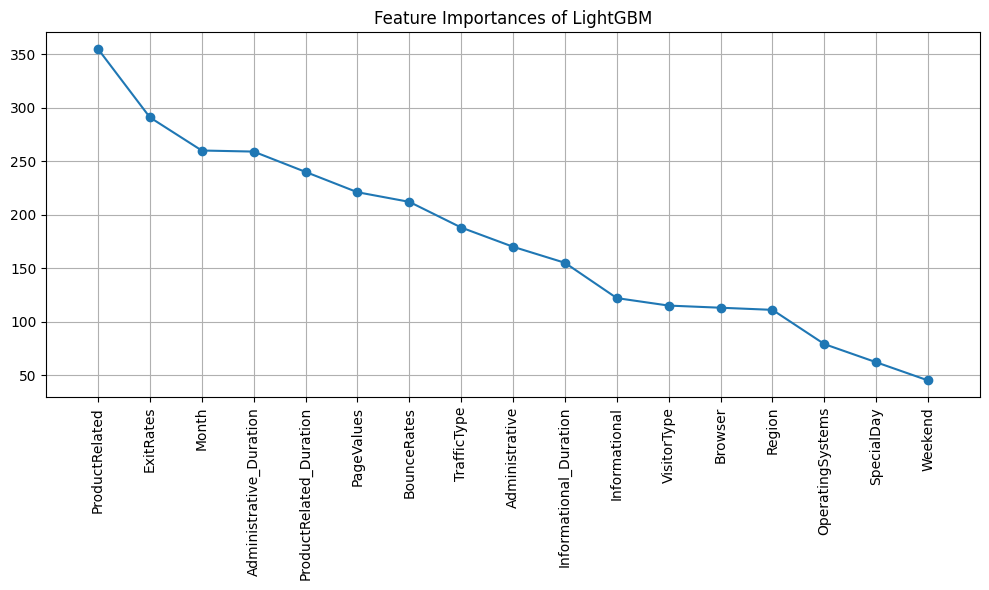

In [ ]:
importances = lgb_classifier.feature_importances_

# Get feature names
feature_names = X_trainn.columns  # Assuming you have column names

# Sort feature importances in descending order
indices = importances.argsort()[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importances of LightGBM")
plt.plot(range(X_trainn.shape[1]), importances[indices], marker='o', linestyle='-')
plt.xticks(range(X_trainn.shape[1]), feature_names[indices], rotation=90)
plt.xlim([-1, X_trainn.shape[1]])
plt.tight_layout()
plt.grid(True)
plt.show()

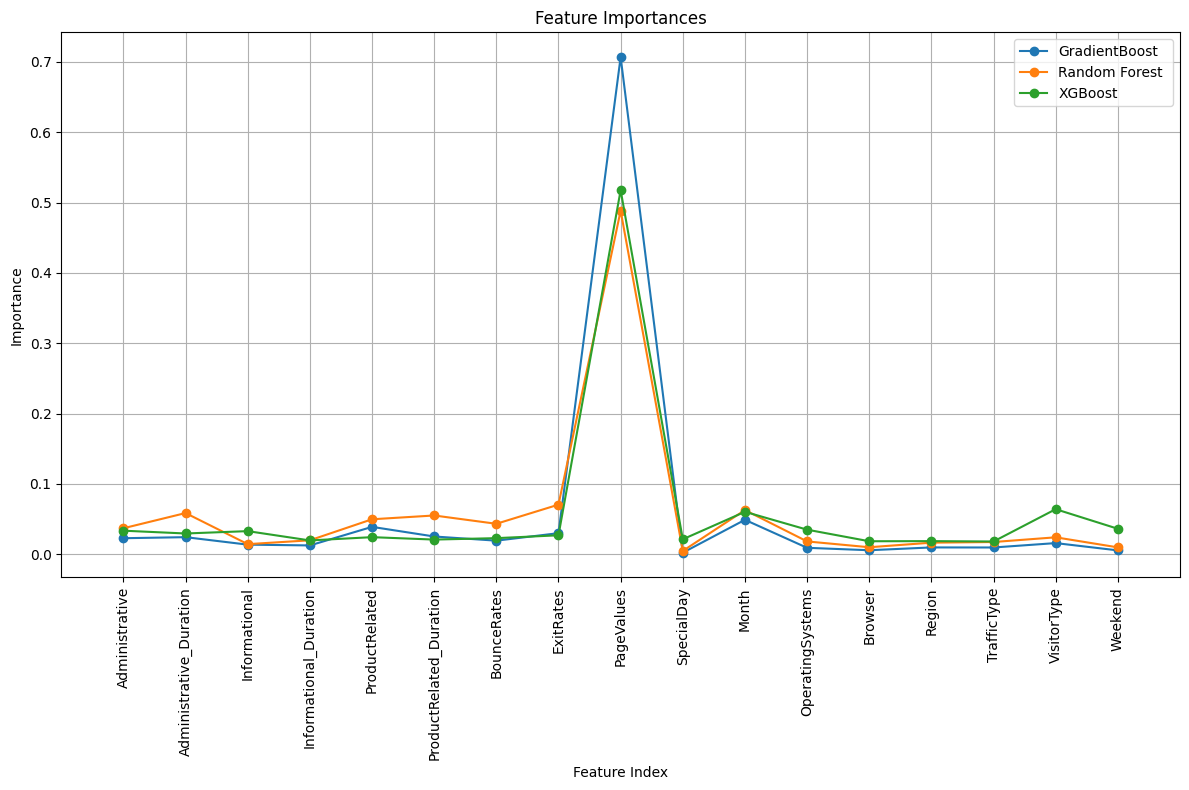

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have stored feature importances for each model in a list
# Replace feature_importances_rf, feature_importances_dt, feature_importances_gb, and feature_importances_lr with your actual feature importances

# Get feature names
feature_names = X_trainn.columns  # Assuming you have column names

# Plot feature importances for all models
plt.figure(figsize=(12, 8))

# Random Forest
indices_gb = range(len(gb_classifier.feature_importances_))

#indices_rf = gb_classifier.feature_importances_.argsort()[::-1]
plt.plot(range(X_trainn.shape[1]), gb_classifier.feature_importances_[indices_gb], marker='o', linestyle='-', label='GradientBoost')

# Decision Tree
indices_rf = range(len(rf_classifier.feature_importances_))
#indices_dt = rf_classifier.feature_importances_.argsort()[::-1]
plt.plot(range(X_trainn.shape[1]),rf_classifier.feature_importances_[indices_rf], marker='o', linestyle='-', label='Random Forest ')

# Decision Tree
indices_xgb = range(len(xgb_classifier.feature_importances_))
#indices_dt = rf_classifier.feature_importances_.argsort()[::-1]
plt.plot(range(X_trainn.shape[1]),xgb_classifier.feature_importances_[indices_xgb], marker='o', linestyle='-', label='XGBoost')



plt.title("Feature Importances")
plt.xlabel("Feature Index")
plt.ylabel("Importance")
plt.xticks(range(X_trainn.shape[1]), feature_names[indices_rf], rotation=90)
plt.xlim([-1, X_trainn.shape[1]])
plt.legend()
plt.tight_layout()
plt.grid()
plt.show()
